<a href="https://colab.research.google.com/github/jsebastianquiroga/DL_Twitter_User_Gender_Classification/blob/main/Notebook/DL_Twitter_Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">



<h1> <strong>Aprendizaje Profundo.</strong></h1> 
<h2> Para: Ing. Julio Omar Palacio Niño, M.Sc.</br></h2>
<h2>Integrantes:</br></h2>
<h2>Antonio Jose Caicedo.</br></h2>
<h2>Leonardo García.</br></h2>
<h2>Juan Sebastián Quiroga Bernal. </h2>

**Este colab puede ser ejecutado por cualquier usuario sin necesidad de cargar los archivos al entorno, debido a que la conexión está configurada para acceder a los archivos desde la nube**.


<h1> <strong>Taller 1: Twitter User Gender Classification.</strong></h1> 

En el presente Notebook, se exploraran los datos del data set de Kaggel: Twitter User Gender Classification. https://www.kaggle.com/crowdflower/twitter-user-gender-classification/

Este conjunto de datos, fue utilziado para entranar un modelo de clasificación de genero conocido como "CrowdFlower AI".

Cuyo proposito era inferir mendiante el perfil de un usuario de Twitter si el usuario era un hombre, mujer o compañia.

Se tienen un total de 20.000 observaciones, conformadas con un nombre de usuario, tuit aleatorio, perfil, la imagen de la cuenta, la ubicación.

<ol>
_unit_id: un id único para el usuario</ol>
<ol>_golden: si el usuario se incluyó en el patrón oro del modelo; TRUE o FALSE</ol>
<ol>_unit_state: estado de la observación; uno de finalized (para contributor-judged) o golden (para gold standard observations)</ol>
<ol>_trusted_judgments: número de juicios de confianza (int); siempre 3 para las observaciones no gold, y lo que puede ser un identificador único para las observaciones gold standard</ol>
<ol>_last_judgment_at: fecha y hora de la última resolución del contribuyente; en blanco para las observaciones gold standard</ol>
<ol>gender: uno de masculino, femenino o marca (para perfiles no humanos)</ol>
<ol>gender:confidence: valor flotante que representa la confianza en el sexo indicado</ol>
<ol>profile_yn: "no" aquí parece significar que el perfil debía formar parte del conjunto de datos pero no estaba disponible cuando los colaboradores fueron a juzgarlo</ol>
<ol>profile_yn:confidence: confianza en la existencia/no existencia del perfil</ol>
<ol>created: fecha y hora de creación del perfil</ol>
<ol>description: descripción del perfil del usuario</ol>
<ol>fav_number: número de tweets que el usuario ha marcado como favoritos</ol>
<ol>gender_gold: si el perfil es dorado, ¿cuál es el género?</ol>
<ol>link_color: el color del enlace en el perfil, como valor hexadecimal</ol>
<ol>name: nombre del usuario</ol>
<ol>profile_yn_gold: si el valor s/n del perfil es dorado</ol>
<ol>profileimage: un enlace a la imagen del perfil</ol>
<ol>retweet_count: número de veces que el usuario ha retuiteado (o posiblemente, ha sido retuiteado)</ol>
<ol>sidebar_color: color de la barra lateral del perfil, como valor hexadecimal</ol>
<ol>text: texto de un tweet aleatorio del usuario</ol>
<ol>tweet_coord: si el usuario tiene activada la localización, las coordenadas</ol> 
<ol>como una cadena con el formato "[latitud, longitud]"</ol>
<ol>tweet_count: número de tweets que ha publicado el usuario</ol>
<ol>tweet_created: cuando se creó el tweet aleatorio (en la columna de texto)</ol>
<ol>tweet_id: el id del tweet aleatorio</ol>
<ol>tweet_location: ubicación del tweet; parece no estar especialmente normalizada</ol>
<ol>user_timezone: la zona horaria del usuario</ol>

El presente notebook, estará dividido en divido en las siguientes partes:
<ol>
<li> TBD:. </li>
<li> TBD. </li>
<li> TBD.</li>
</ol>

***

# <h1><strong> 1. Cargar el data set: </h1></strong>

El dataset del link en referencia, fue descargado previamente y subido a google drive, para poder cargar el presente notebook sin problemas al momento de cargar la información. </br>

In [18]:
# Conexion a gdrive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

twitter = '1gwF2scW3dpklHez9kNws1tlnSrK0XxWU' 


download = drive.CreateFile({'id': twitter}) 
download.GetContentFile('gender-classifier-DFE-791531.csv')

In [20]:
#LECTURA NODOS Y EDGES FACEBOOK
df_tw = pd.read_csv(r'gender-classifier-DFE-791531.csv',encoding="latin1")
df_tw.info()
df_tw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


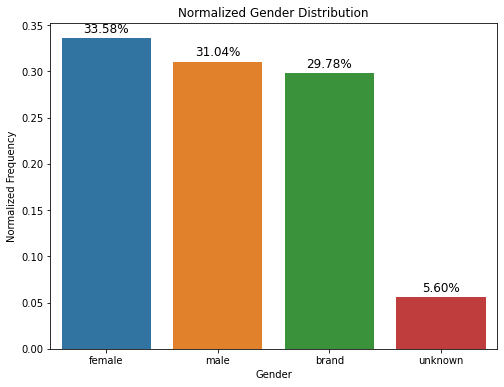

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

normalized_gender_counts = df_tw.gender.value_counts(normalize=True)

# Using seaborn for the bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=normalized_gender_counts.index, y=normalized_gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Gender Distribution')

# Add values to the bars
for bar in bar_plot.containers[0]:
    height = bar.get_height()
    bar_plot.annotate(
        f'{height:.2%}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=12
    )

plt.show()

Se encuentra que los tres principales generos estan balanceados, pero se observa un 5,6% de los datos que tiene como genero "Unkown".

In [22]:
df_tw.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

<Axes: xlabel='gender', ylabel='retweet_count'>

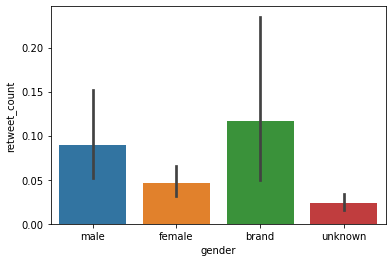

In [23]:
sns.barplot(x='gender',y='retweet_count',data=df_tw)

In [24]:
df_tw['user_timezone'].unique()
df_tw.groupby('user_timezone').size()

user_timezone
Abu Dhabi              25
Adelaide                5
Africa/Cairo            1
Africa/Lagos            2
Africa/Nairobi          1
                       ..
Wellington             20
West Central Africa    43
Yakutsk                 8
Yerevan                 6
Zagreb                  6
Length: 156, dtype: int64

In [25]:
df_tw.user_timezone.unique()
df_tw.groupby('tweet_created').size()

tweet_created
10/26/15 12:39    1952
10/26/15 12:40    8076
10/26/15 13:18     265
10/26/15 13:19    5892
10/26/15 13:20    3865
dtype: int64

<Figure size 2160x2160 with 0 Axes>

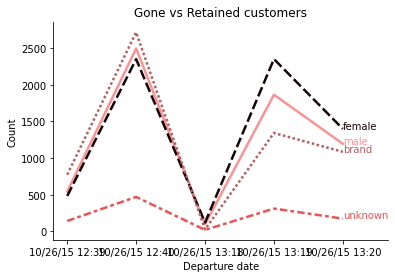

In [26]:
df_viaje = df_tw.copy()
df_viaje = df_viaje[['tweet_created', 'gender']]
df_viaje['male'] = np.where(df_viaje.gender=='male',1,0)
df_viaje['female'] = np.where(df_viaje.gender=='female',1,0)
df_viaje['brand'] = np.where(df_viaje.gender=='brand',1,0)
df_viaje['unknown'] = np.where(df_viaje.gender=='unknown',1,0)
df_viaje
df_d = df_viaje.groupby(['tweet_created']).agg(
    male = ('male','sum'),
    female = ('female','sum'),
    brand = ('brand','sum'),
    unknown = ('unknown','sum'))
df_d
# df_d
import seaborn as sns
plt.figure(figsize=(30, 30))
fig, ax = plt.subplots()
ax = sns.lineplot(data=df_d, linewidth=2.5, palette=['#FA9494', '#140303', '#B46060', '#EA5455'], legend=None, linestyle='solid')
for line, name in zip(ax.lines, df_d.columns.tolist()):
	y = line.get_ydata()[-1]
	x = line.get_xdata()[-1]
	if not np.isfinite(y):
	    y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
	if not np.isfinite(y) or not np.isfinite(x):
	    continue     
	text = ax.annotate(name,
		       xy=(x, y),
		       xytext=(0, 0),
		       color=line.get_color(),
		       xycoords=(ax.get_xaxis_transform(),
				 ax.get_yaxis_transform()),
		       textcoords="offset points")
	text_width = (text.get_window_extent(
	fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
	if np.isfinite(text_width):
		ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)
ax.set(xlabel='Departure date', ylabel='Count', title='Gone vs Retained customers')
#ax.legend(title='Type', title_fontsize = 13)
sns.despine(bottom=False, left=False)
plt.grid(False)
plt.show()

In [27]:
ct = pd.crosstab(df_tw['gender'], [df_tw['_golden']])#, normalize='columns')#, margins=True)
# # Plot the crosstab as a bar chart
# ax = ct.plot(kind='bar', figsize=(10, 6))
# ax.set_xlabel('Gender')
# ax.set_ylabel('Frequency')
# ax.set_title('Normalized Crosstab')
# plt.xticks(rotation=0)  # Rotate x-axis labels

# # Add percentage values on top of the bars
# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy() 
#     ax.annotate(f'{height:.2}', (x + width / 2, y + height), ha='center', va='bottom')

# # Display the plot
# plt.show()
ct

_golden,False,True
gender,,
brand,5928,14
female,6685,15
male,6173,21
unknown,1117,0


In [28]:
pd.crosstab(df_tw['gender'], [df_tw['_unit_state']])

_unit_state,finalized,golden
gender,,
brand,5928,14
female,6685,15
male,6173,21
unknown,1117,0


In [30]:
pd.DataFrame(np.where(df_tw._trusted_judgments != 3,0,3)).value_counts(normalize=True)


3    0.997506
0    0.002494
dtype: float64

<Figure size 2160x2160 with 0 Axes>

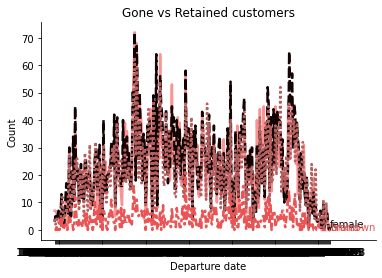

In [31]:
df_viaje = df_tw.copy()
df_viaje = df_viaje[['_last_judgment_at', 'gender']]
df_viaje['male'] = np.where(df_viaje.gender=='male',1,0)
df_viaje['female'] = np.where(df_viaje.gender=='female',1,0)
df_viaje['brand'] = np.where(df_viaje.gender=='brand',1,0)
df_viaje['unknown'] = np.where(df_viaje.gender=='unknown',1,0)
df_viaje
df_d = df_viaje.groupby(['_last_judgment_at']).agg(
    male = ('male','sum'),
    female = ('female','sum'),
    brand = ('brand','sum'),
    unknown = ('unknown','sum'))
df_d
# df_d
import seaborn as sns
plt.figure(figsize=(30, 30))
fig, ax = plt.subplots()
ax = sns.lineplot(data=df_d, linewidth=2.5, palette=['#FA9494', '#140303', '#B46060', '#EA5455'], legend=None, linestyle='solid')
for line, name in zip(ax.lines, df_d.columns.tolist()):
	y = line.get_ydata()[-1]
	x = line.get_xdata()[-1]
	if not np.isfinite(y):
	    y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
	if not np.isfinite(y) or not np.isfinite(x):
	    continue     
	text = ax.annotate(name,
		       xy=(x, y),
		       xytext=(0, 0),
		       color=line.get_color(),
		       xycoords=(ax.get_xaxis_transform(),
				 ax.get_yaxis_transform()),
		       textcoords="offset points")
	text_width = (text.get_window_extent(
	fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
	if np.isfinite(text_width):
		ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)
ax.set(xlabel='Departure date', ylabel='Count', title='Gone vs Retained customers')
#ax.legend(title='Type', title_fontsize = 13)
sns.despine(bottom=False, left=False)
plt.grid(False)
plt.show()

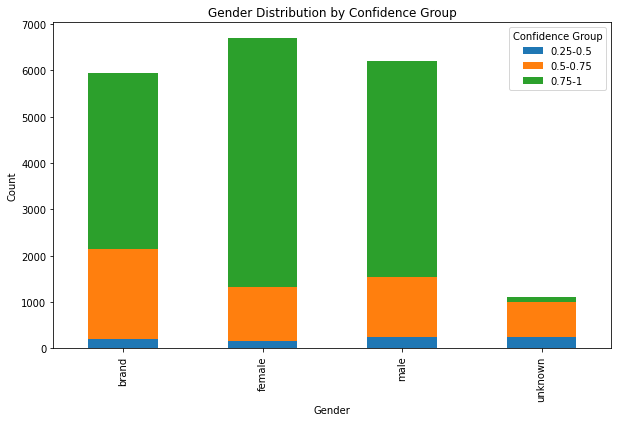

In [32]:
# Define the bins and labels for the groups
bins = [0, 0.25, 0.5, 0.75, 1]
labels = ['0-0.25', '0.25-0.5', '0.5-0.75', '0.75-1']

# Create a new column 'group' based on the ranges and labels
df_tw['group_gender:confidence'] = pd.cut(df_tw['gender:confidence'], bins=bins, labels=labels)


# Create a crosstab
ct = pd.crosstab(df_tw['gender'], df_tw['group_gender:confidence'])

# Plot the crosstab as a bar plot
ax = ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender Distribution by Confidence Group')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Confidence Group', loc='upper right')

# Display the plot
plt.show()

fav_number,0,1,2,3,4,5,6,7,8,9,...,189970,190586,190591,219586,220108,226550,248255,259583,260488,341621
gender,,,,,,,,,,,,,,,,,,,,,
brand,2280,207,126,82,65,83,55,59,48,30,...,0,1,1,1,1,0,1,0,0,0
female,427,71,53,47,27,29,19,22,18,20,...,0,0,0,0,0,1,0,0,1,1
male,295,92,54,48,44,45,32,44,37,21,...,1,0,0,0,0,0,0,1,0,0
unknown,324,23,20,16,11,5,4,13,3,8,...,0,0,0,0,0,0,0,0,0,0


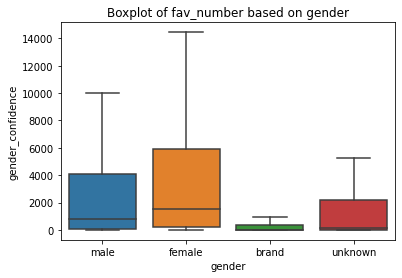

In [43]:
#Outliers
sns.boxplot(data=df_tw, x='gender', y='fav_number', showfliers=False)
#Add a title and y-axis label
plt.title('Boxplot of fav_number based on gender')
plt.ylabel('gender_confidence')
# Show the plot
plt.show()

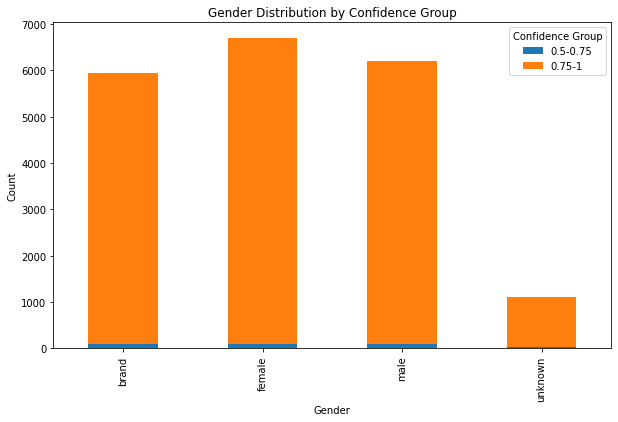

In [39]:
# Define the bins and labels for the groups
bins = [0, 0.25, 0.5, 0.75, 1]
labels = ['0-0.25', '0.25-0.5', '0.5-0.75', '0.75-1']

# Create a new column 'group' based on the ranges and labels
df_tw['group_profile_yn:confidence'] = pd.cut(df_tw['profile_yn:confidence'], bins=bins, labels=labels)


# Create a crosstab
ct = pd.crosstab(df_tw['gender'], df_tw['group_profile_yn:confidence'])

# Plot the crosstab as a bar plot
ax = ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender Distribution by Confidence Group')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Confidence Group', loc='upper right')

 

# Display the plot
plt.show()

In [44]:
pd.crosstab(df_tw['gender'], [df_tw['link_color']])


link_color,0,0000A0,0000FF,0006B3,00070A,00080A,0009B3,0009FF,000A0A,000A1C,...,FFCBA4,FFCC01,FFCC4D,FFCCCC,FFCCFF,FFCDF8,FFD3DC,FFD5BA,FFD700,FFFFFF
gender,,,,,,,,,,,,,,,,,,,,,
brand,82,0,34,0,0,0,0,0,0,0,...,0,1,24,0,0,0,0,0,0,1
female,154,0,14,0,0,0,0,1,1,0,...,1,0,38,1,0,0,0,1,0,2
male,147,1,34,1,1,1,1,0,0,1,...,0,0,25,0,0,0,0,0,1,0
unknown,34,0,2,0,0,0,0,0,0,0,...,0,0,6,0,1,1,1,0,0,0


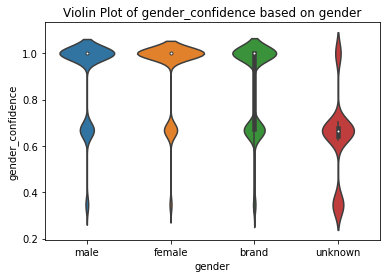

In [34]:
# Create a violin plot of Tuition with a hue based on Is.Non.Annual.
sns.violinplot(data=df_tw, x='gender', y='gender:confidence')
# Add a title and y-axis label
plt.title('Violin Plot of gender_confidence based on gender')
plt.ylabel('gender_confidence')
# Show the plot
plt.show()